# **📊 Projeto de Predição de Churn - TelecomX**

#**📌 Sobre o Projeto**

Este projeto é a segunda etapa do desafio “Telecom X – Análise de Evasão de Clientes”, cujo objetivo foi compreender os fatores que levam ao cancelamento de clientes (Churn) em uma empresa de telecomunicações.

# **🎯 Objetivo**

Desenvolver um modelo de classificação capaz de prever com alta precisão quais clientes têm maior probabilidade de cancelar seus serviços (churn), utilizando algoritmos de Machine Learning supervisionado.

# 1. Importando as bibliotecas e carregamento dos dados

In [17]:
# Importação das bibliotecas principais
import pandas as pd
import numpy as sn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [18]:
url_dados = 'https://raw.githubusercontent.com/barretosilva/telecomx2/e1b6c54af4631ee4528d6e21bba3e9c3789c2806/dados_tratados.csv'

In [19]:
# Carregando os dados
dados = pd.read_csv(url_dados)
dados.head()

,id,Churn,genero,idoso,possui_parceiro,possui_dependentes,tempo_contrato,servico_telefone,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,total_cobrado,contas_diarias
0,0002-ORFBO,não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,Sim,Cheque enviado,65.6,593.30,2.186667
1,0003-MKNFE,não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,59.9,542.40,1.996667
2,0004-TLHLJ,sim,Masculino,0,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.9,280.85,2.463333
3,0011-IGKFF,sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.0,1237.85,3.266667
4,0013-EXCHZ,sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.9,267.40,2.796667


In [20]:
dados.describe()

,idoso,tempo_contrato,valor_mensal,total_cobrado,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [21]:
dados.describe(include='O')

,id,Churn,genero,possui_parceiro,possui_dependentes,servico_telefone,multiplas_linhas,tipo_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,não,Masculino,Não,Não,Sim,Não,Fibra óptica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Cheque eletrônico
freq,1,5163,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [22]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7032 non-null   object 
 1   Churn                 7032 non-null   object 
 2   genero                7032 non-null   object 
 3   idoso                 7032 non-null   int64  
 4   possui_parceiro       7032 non-null   object 
 5   possui_dependentes    7032 non-null   object 
 6   tempo_contrato        7032 non-null   int64  
 7   servico_telefone      7032 non-null   object 
 8   multiplas_linhas      7032 non-null   object 
 9   tipo_internet         7032 non-null   object 
 10  seguranca_online      7032 non-null   object 
 11  backup_online         7032 non-null   object 
 12  protecao_dispositivo  7032 non-null   object 
 13  suporte_tecnico       7032 non-null   object 
 14  streaming_tv          7032 non-null   object 
 15  streaming_filmes     

In [23]:
dados.columns

Index(['id', 'Churn', 'genero', 'idoso', 'possui_parceiro',
       'possui_dependentes', 'tempo_contrato', 'servico_telefone',
       'multiplas_linhas', 'tipo_internet', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'streaming_tv', 'streaming_filmes', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento', 'valor_mensal', 'total_cobrado', 'contas_diarias'],
      dtype='object')

#2. Análise Exploratória de Dados (EDA) e Limpeza Inicial

Com os dados carregados em nosso DataFrame, iniciamos a fase de Análise Exploratória. O objetivo é compreender a fundo as características dos nossos dados, a distribuição das variáveis e as primeiras relações com a nossa variável-alvo, o Churn. Começaremos com um passo de limpeza fundamental: a remoção de colunas que não são úteis para a modelagem.

### 2.1 Remoção de Colunas Irrelevantes



A primeira coluna que avaliamos é a ['id']. Esta coluna serve como um identificador único para cada cliente. Embora seja essencial em um banco de dados relacional para identificar registros, para um modelo de machine learning, ela não possui nenhum valor preditivo. O modelo não pode generalizar ou aprender padrões a partir de um identificador que é, por natureza, único para cada linha. Manter colunas como essa pode introduzir ruído e até prejudicar a performance do modelo. Portanto, nosso primeiro passo de limpeza será removê-la para focarmos apenas nas variáveis que descrevem o comportamento e as características dos clientes.

In [24]:
# Removendo a coluna 'ID_Cliente'
# Usamos 'inplace=True' para modificar o DataFrame diretamente
dados.drop(columns=['id'], inplace=True)
dados.head()

,Churn,genero,idoso,possui_parceiro,possui_dependentes,tempo_contrato,servico_telefone,multiplas_linhas,tipo_internet,seguranca_online,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,total_cobrado,contas_diarias
0,não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,Não,...,Não,Sim,Sim,Não,Anual,Sim,Cheque enviado,65.6,593.30,2.186667
1,não,Masculino,0,Não,Não,9,Sim,Sim,DSL,Não,...,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,59.9,542.40,1.996667
2,sim,Masculino,0,Não,Não,4,Sim,Não,Fibra óptica,Não,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.9,280.85,2.463333
3,sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra óptica,Não,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.0,1237.85,3.266667
4,sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra óptica,Não,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.9,267.40,2.796667


In [25]:
for col in dados.columns:
  print(f'{col}: {dados[col].nunique()}')
  if dados[col].nunique() < 100:
    print(dados[col].unique())
  else:
    print('Muitos registros únicos para imprimir.')
  print('-' * 50)

Churn: 2
['não' 'sim']
--------------------------------------------------
genero: 2
['Feminino' 'Masculino']
--------------------------------------------------
idoso: 2
[0 1]
--------------------------------------------------
possui_parceiro: 2
['Sim' 'Não']
--------------------------------------------------
possui_dependentes: 2
['Sim' 'Não']
--------------------------------------------------
tempo_contrato: 72
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
--------------------------------------------------
servico_telefone: 2
['Sim' 'Não']
--------------------------------------------------
multiplas_linhas: 3
['Não' 'Sim' 'Sem serviço de telefone']
--------------------------------------------------
tipo_internet: 3
['DSL' 'Fibra óptica' 'Não']
--------------------------------------------------
seguranca_online: 3


In [26]:
colunas_correcao = [
    'seguranca_online', 'backup_online', 'protecao_dispositivo',
    'suporte_tecnico', 'streaming_tv', 'streaming_filmes'
]

for col in colunas_correcao :
    dados[col] = dados[col].replace( 'Sem serviço de internet', 'Não')

In [27]:
for col in dados.columns:
  print(f'{col}: {dados[col].nunique()}')
  if dados[col].nunique() < 100:
    print(dados[col].unique())
  else:
    print('Muitos registros únicos para imprimir.')
  print('-' * 50)

Churn: 2
['não' 'sim']
--------------------------------------------------
genero: 2
['Feminino' 'Masculino']
--------------------------------------------------
idoso: 2
[0 1]
--------------------------------------------------
possui_parceiro: 2
['Sim' 'Não']
--------------------------------------------------
possui_dependentes: 2
['Sim' 'Não']
--------------------------------------------------
tempo_contrato: 72
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
--------------------------------------------------
servico_telefone: 2
['Sim' 'Não']
--------------------------------------------------
multiplas_linhas: 3
['Não' 'Sim' 'Sem serviço de telefone']
--------------------------------------------------
tipo_internet: 3
['DSL' 'Fibra óptica' 'Não']
--------------------------------------------------
seguranca_online: 2


### 2.2 Análise e Remoção de Colunas Redundantes

Continuando a limpeza, é crucial verificar se existem colunas redundantes, ou seja, variáveis que fornecem a mesma informação de formas diferentes. Manter tais colunas pode levar a problemas de multicolinearidade, afetando a performance e a interpretabilidade de alguns modelos de machine learning. Neste conjunto de dados, identificamos que a coluna ['contas_diarias'] é diretamente derivada da coluna ['valor_mensal'] (valor_mensal / 30). Como ela não agrega nova informação ao modelo, optamos por removê-la para simplificar o dataset e evitar redundância.



In [28]:
# Verificando a correlação direta entre Custo_Mensal e Custo_Diario
# Esperamos um valor muito próximo de 1.0
print("Correlação entre valor_mensal e contas_diarias:")
print(dados[['valor_mensal', 'contas_diarias']].corr())
print("-" * 50)

# Removendo a coluna 'Custo_Diario'
dados.drop(columns=['contas_diarias'], inplace=True)

# Exibindo as primeiras linhas para confirmar a ausência da coluna
dados.head()

Correlação entre valor_mensal e contas_diarias:
                valor_mensal  contas_diarias
valor_mensal             1.0             1.0
contas_diarias           1.0             1.0
--------------------------------------------------


,Churn,genero,idoso,possui_parceiro,possui_dependentes,tempo_contrato,servico_telefone,multiplas_linhas,tipo_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,total_cobrado
0,não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque enviado,65.6,593.30
1,não,Masculino,0,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,59.9,542.40
2,sim,Masculino,0,Não,Não,4,Sim,Não,Fibra óptica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.9,280.85
3,sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra óptica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.0,1237.85
4,sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra óptica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.9,267.40


### 2.3 Análise da Variável-Alvo (Churn) - verificação da proporção de evasão
Um passo crucial antes da modelagem é entender a distribuição da nossa variável-alvo, Churn. Isso nos ajuda a identificar se existe um desequilíbrio entre as classes (clientes que cancelaram vs. clientes que permaneceram), o que pode influenciar a escolha das métricas de avaliação e até mesmo a estratégia de modelagem.

In [29]:
# Calculando a proporção de Churn
churn_counts = dados['Churn'].value_counts()
churn_percentage = dados['Churn'].value_counts(normalize=True) * 100

# Exibindo os resultados
print("Contagem de Churn:")
print(churn_counts)
print("\nProporção de Churn (%):")
print(churn_percentage)

Contagem de Churn:
Churn
não    5163
sim    1869
Name: count, dtype: int64

Proporção de Churn (%):
Churn
não    73.421502
sim    26.578498
Name: proportion, dtype: float64


In [30]:
px.histogram(dados, x = 'Churn', text_auto = True)

##🛠️ Pre processamento

# 3. Tranformação de dados - Encoding

Transforme as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilize um método de codificação adequado, como o **one-hot encodin**g.

## 3.1 Variáveis explicativas e variável alvo

Para fazer a previsão dos valores com um modelo de machine learning, precisamos fazer a separação da variável alvo e variáveis explicativas. O y representa a variável que queremos prever, enquanto x representa todas as variáveis que serão utilizadas para explicar o comportamento de **y**.

In [31]:
x = dados.drop('Churn', axis = 1)
y = dados['Churn']

In [32]:
x.head()

,genero,idoso,possui_parceiro,possui_dependentes,tempo_contrato,servico_telefone,multiplas_linhas,tipo_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,total_cobrado
0,Feminino,0,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque enviado,65.6,593.30
1,Masculino,0,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,59.9,542.40
2,Masculino,0,Não,Não,4,Sim,Não,Fibra óptica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.9,280.85
3,Masculino,1,Sim,Não,13,Sim,Não,Fibra óptica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.0,1237.85
4,Feminino,1,Sim,Não,3,Sim,Não,Fibra óptica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.9,267.40


In [33]:
y.head()

,Churn
0,não
1,não
2,sim
3,sim
4,sim


# 3.2 Transformando as variáveis explicativas

Os algoritmos de machine learning não compreendem dados no formato de texto, portanto devemos fazer transformações nos dados para o formato numérico para que o algoritmo consiga compreender as informações. Essa transformação precisa ser feita de forma que não altere a informação original do conjunto de dados, portanto não basta simplesmente alterar os valores para valores numéricos aleatórios.

In [34]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [35]:
colunas = x.columns
colunas

Index(['genero', 'idoso', 'possui_parceiro', 'possui_dependentes',
       'tempo_contrato', 'servico_telefone', 'multiplas_linhas',
       'tipo_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv',
       'streaming_filmes', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento', 'valor_mensal', 'total_cobrado'],
      dtype='object')

In [36]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['genero', 'possui_parceiro', 'possui_dependentes',
       'servico_telefone', 'multiplas_linhas',
       'tipo_internet', 'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv',
       'streaming_filmes', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [37]:
x = one_hot.fit_transform(x)

In [38]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__genero_Masculino',
       'onehotencoder__possui_parceiro_Sim',
       'onehotencoder__possui_dependentes_Sim',
       'onehotencoder__servico_telefone_Sim',
       'onehotencoder__multiplas_linhas_Não',
       'onehotencoder__multiplas_linhas_Sem serviço de telefone',
       'onehotencoder__multiplas_linhas_Sim',
       'onehotencoder__tipo_internet_DSL',
       'onehotencoder__tipo_internet_Fibra óptica',
       'onehotencoder__tipo_internet_Não',
       'onehotencoder__seguranca_online_Sim',
       'onehotencoder__backup_online_Sim',
       'onehotencoder__protecao_dispositivo_Sim',
       'onehotencoder__suporte_tecnico_Sim',
       'onehotencoder__streaming_tv_Sim',
       'onehotencoder__streaming_filmes_Sim',
       'onehotencoder__tipo_contrato_Anual',
       'onehotencoder__tipo_contrato_Bienal',
       'onehotencoder__tipo_contrato_Mensal',
       'onehotencoder__fatura_digital_Sim',
       'onehotencoder__metodo_pagamento_Cartão de crédito (automático)

In [39]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__genero_Masculino,onehotencoder__possui_parceiro_Sim,onehotencoder__possui_dependentes_Sim,onehotencoder__servico_telefone_Sim,onehotencoder__multiplas_linhas_Não,onehotencoder__multiplas_linhas_Sem serviço de telefone,onehotencoder__multiplas_linhas_Sim,onehotencoder__tipo_internet_DSL,onehotencoder__tipo_internet_Fibra óptica,onehotencoder__tipo_internet_Não,...,onehotencoder__tipo_contrato_Mensal,onehotencoder__fatura_digital_Sim,onehotencoder__metodo_pagamento_Cartão de crédito (automático),onehotencoder__metodo_pagamento_Cheque eletrônico,onehotencoder__metodo_pagamento_Cheque enviado,onehotencoder__metodo_pagamento_Transferência bancária (automática),remainder__idoso,remainder__tempo_contrato,remainder__valor_mensal,remainder__total_cobrado
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9.0,65.60,593.30
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,59.90,542.40
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,73.90,280.85
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,13.0,98.00,1237.85
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,55.15,742.90
7028,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,22.0,85.10,1873.70
7029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,50.30,92.75
7030,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,67.85,4627.65


# 3.3 Transformando a variável alvo
Assim como as variáveis explicativas, a variável alvo também precisa ser alterada para o formato numérico. Podemos representar uma variável alvo binária como 0 ou 1, onde 0 indica ausência da característica da variável e 1 representa a presença da característica.

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
label_ecoder = LabelEncoder()

In [42]:
y = label_ecoder.fit_transform(y)

In [43]:
y

array([0, 0, 1, ..., 0, 0, 0])

## 4. Correlação

Nesta etapa, aprofundamos nossa análise para entender como as variáveis se relacionam entre si e, mais importante, como elas se relacionam com nossa variável-alvo, Churn.

**Matriz de Correlação**

Primeiro, vamos calcular a matriz de correlação para todas as variáveis numéricas. Isso nos ajuda a identificar:

*Multicolinearidade*: Variáveis preditoras que têm alta correlação entre si (o que já nos levou a remover Custo_Diario).

*Preditores Potenciais*: Variáveis que têm a maior correlação (positiva ou negativa) com a coluna Churn. Essas são, teoricamente, as mais influentes para o nosso modelo.

# 4.1 Análise de Correlação

In [44]:
# Identificar colunas numéricas
dados_numericos = dados.select_dtypes(include=[np.number])
print("Colunas numéricas encontradas:", dados_numericos.columns.tolist())


Colunas numéricas encontradas: ['idoso', 'tempo_contrato', 'valor_mensal', 'total_cobrado']


In [45]:
# Correlação
correlacao = dados_numericos.corr()
correlacao

,idoso,tempo_contrato,valor_mensal,total_cobrado
idoso,1.000000,0.015683,0.219874,0.102411
tempo_contrato,0.015683,1.000000,0.246862,0.825880
valor_mensal,0.219874,0.246862,1.000000,0.651065
total_cobrado,0.102411,0.825880,0.651065,1.000000


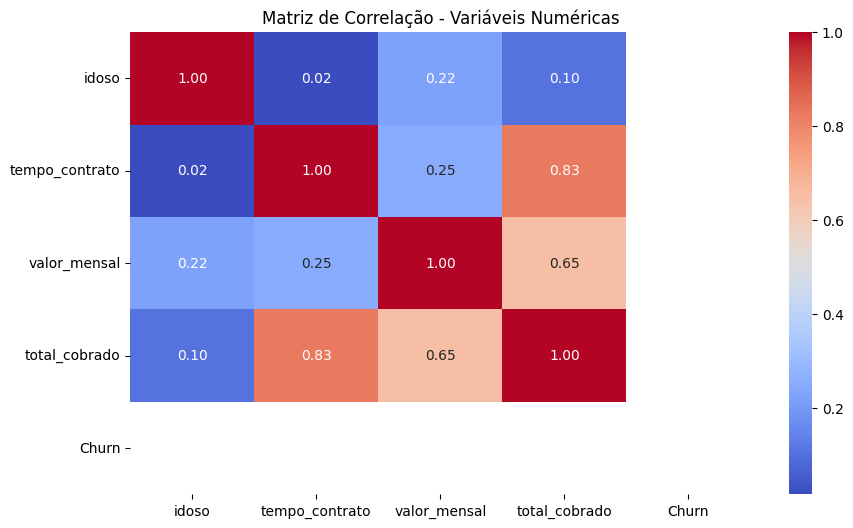

In [46]:
# Selecionar apenas variáveis numéricas
df_numeric = dados.select_dtypes(include=["int64", "float64"])

# Converter Churn para numérico
df_numeric["Churn"] = dados["Churn"].map({"Yes": 1, "No": 0})


# Calcular matriz de correlação
corr_matrix = df_numeric.corr()

# Visualizar heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.show()

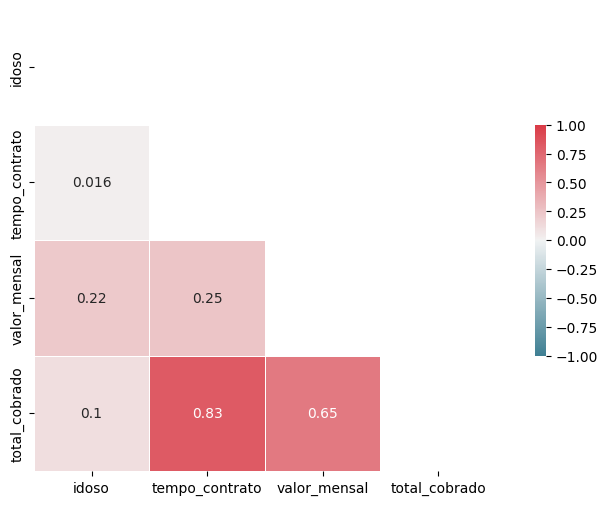

In [47]:
# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(correlacao, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(10, 6))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlacao, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

#4.2  Análises Direcionadas (Tempo de Contrato e Gastos)

Para investigar como o tempo de contrato e o total gasto influenciam a evasão, o Boxplot é excelente para mostrar a distribuição e identificar se clientes que saem (Churn=sim) tendem a ter contratos mais curtos ou gastos diferentes.

/tmp/ipython-input-438/223351609.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-438/223351609.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




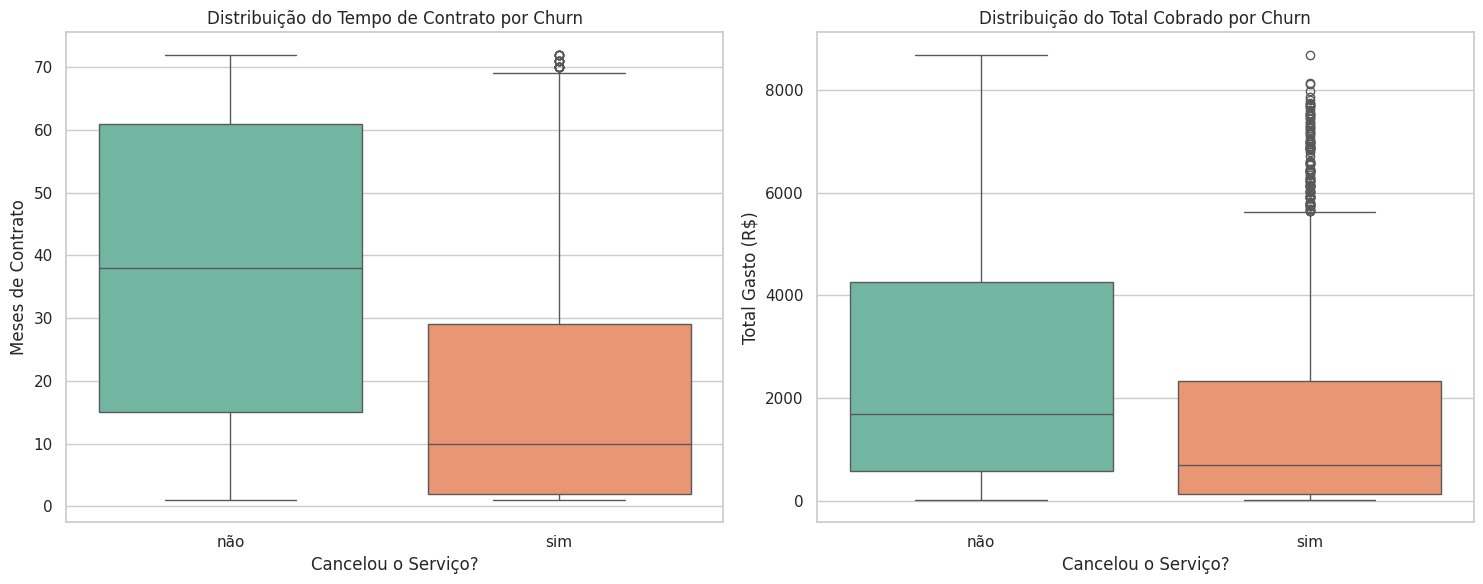

In [48]:
# Configurando o estilo dos gráficos
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Tempo de contrato × Evasão
sns.boxplot(x='Churn', y='tempo_contrato', data=dados, ax=axes[0], palette='Set2')
axes[0].set_title('Distribuição do Tempo de Contrato por Churn')
axes[0].set_xlabel('Cancelou o Serviço?')
axes[0].set_ylabel('Meses de Contrato')

# Gráfico 2: Total gasto × Evasão
sns.boxplot(x='Churn', y='total_cobrado', data=dados, ax=axes[1], palette='Set2')
axes[1].set_title('Distribuição do Total Cobrado por Churn')
axes[1].set_xlabel('Cancelou o Serviço?')
axes[1].set_ylabel('Total Gasto (R$)')

plt.tight_layout()
plt.show()

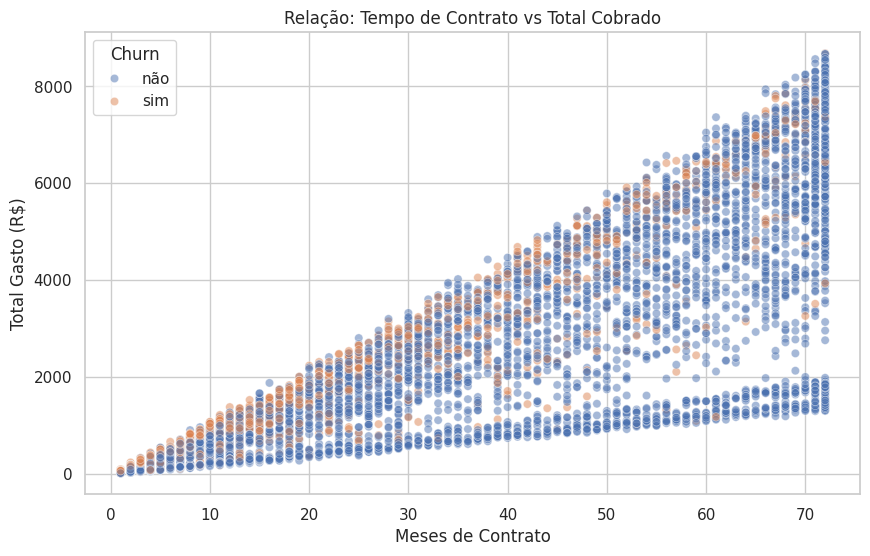

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_contrato', y='total_cobrado', hue='Churn', data=dados, alpha=0.5)
plt.title('Relação: Tempo de Contrato vs Total Cobrado')
plt.xlabel('Meses de Contrato')
plt.ylabel('Total Gasto (R$)')
plt.show()

# 5. Ajustando modelos

## 5.1 Dividindo os dados entre treino e teste
Para compreender se o modelo está de fato aprendendo com os dados, precisamos fazer uma separação dos dados entre treinamento e teste. Os dados de treinamento são usados para ajustar o modelo, enquanto os dados de teste servem para verificar o aprendizado do modelo em dados que não foram utilizados no momento do ajuste.

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y,  random_state = 5)

## 5.2 Modelo de base


O modelo mais simples de classificar os dados é simplesmente utilizar um algoritmo que chuta todas as classificações para a classe que tem maior frequência. Esse algoritmo serve como um critério de comparação, para identificar se os outros modelos tem um desempenho melhor do que a classificação mais simples possível.

In [52]:
from sklearn.dummy import DummyClassifier

In [53]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.7343572241183163

## 5.3 Árvore de decisão

O modelo de árvore de decisão é muito utilizado pela sua alta explicabilidade e processamento rápido, mantendo um desempenho bem interessante.

Ele se baseia em decisões simples tomadas pelo algoritmo, separando os dados com base em comparações de menor e maior nos valores das colunas da base de dados.

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
arvore = DecisionTreeClassifier(max_depth = 3, random_state =5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [56]:
arvore.predict(x_teste)

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
arvore.score(x_teste, y_teste)

0.7878270762229806

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [59]:
nome_colunas = ['genero',
       'possui_parceiro',
       'possui_dependentes',
       'servico_telefone',
       'multiplas_linhas_Não',
       'multiplas_linhas_Sem serviço de telefone',
       'multiplas_linhas_Sim',
       'tipo_internet_DSL',
       'tipo_internet_Fibra óptica',
       'tipo_internet_Não',
       'seguranca_onlin	e_Não',
       'seguranca_online_Sem serviço de internet',
       'seguranca_online_Sim',
       'backup_online_Não',
       'backup_online_Sem serviço de internet',
       'backup_online_Sim',
       'protecao_dispositivo_Não',
       'protecao_dispositivo_Sem serviço de internet',
       'protecao_dispositivo_Sim',
       'suporte_tecnico_Não',
       'suporte_tecnico_Sem serviço de internet',
       'suporte_tecnico_Sim',
       'streaming_tv_Não',
       'streaming_tv_Sem serviço de internet',
       'streaming_tv_Sim',
       'streaming_filmes_Não',
       'streaming_filmes_Sem serviço de internet',
       'streaming_filmes_Sim',
       'tipo_contrato_Anual',
       'tipo_contrato_Bienal',
       'tipo_contrato_Mensal',
       'fatura_digital',
       'metodo_pagamento_Cartão de crédito (automático)',
       'metodo_pagamento_Cheque eletrônico',
       'metodo_pagamento_Cheque enviado',
       'metodo_pagamento_Transferência bancária (automática)',
       'idoso',
       'tempo_contrato',
       'valor_mensal',
       'total_cobrado']

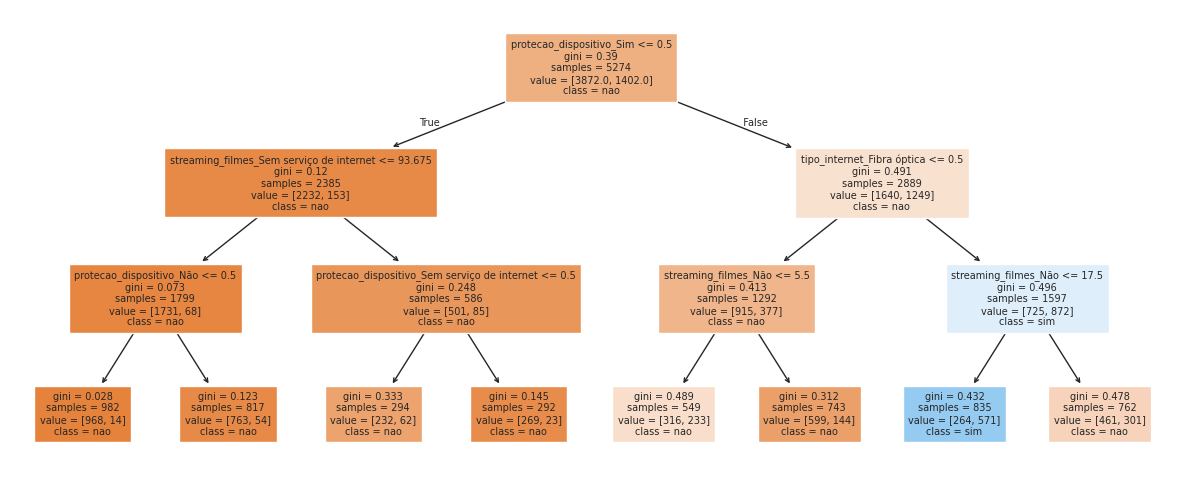

In [60]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 7, feature_names = nome_colunas);

# 6. Seleção de modelos

## 6.1 Normalizando os dados

Alguns algoritmos podem atribuir um peso maior aos valores das variáveis devido a escala dos valores e não pela importância da classificação da variável alvo. Por exemplo, em uma base de dados com a colunas idade e salário, o algoritmo pode dar um peso de decisão maior para os valores do salário simplesmente por estar em uma escala maior do que os valores de idade, e não porque a variável salário é mais importante do que a variável idade.

Nesses casos, precisamos fazer uma transformação nos dados para que fiquem em uma mesma escala, fazendo com que o algoritmo não seja influenciado incorretamente pelos valores numéricos divergentes entre as variáveis.

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [63]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.985915,0.465869,0.538071
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.971831,0.715994,0.734726
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.802817,0.907324,0.706870
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.830986,0.413054,0.399795
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.394366,0.757848,0.304041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.619718,0.627803,0.433536
5270,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.577465,0.371201,0.277281
5271,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.619718,0.015944,0.100110
5272,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.394366,0.475336,0.218476


## 6.2 KNN

O algoritmo KNN se baseia no cálculo de distância entre os registros da base de dados e busca elementos que estejam próximos uns dos outros (vizinhos) para tomar a decisão da classificação.

Por conta de usar cálculos de distância, esse algoritmo é influenciado pela escala das variáveis e por conta disso é necessário uma transformação nos dados antes de utilizar esse método.

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier()

In [66]:
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [67]:
x_teste_normalizado = normalizacao.transform(x_teste)

In [68]:
knn.score(x_teste_normalizado, y_teste)

0.7508532423208191

## 6.3 Regressão Logística e SVM (Análise de Coeficientes)
Para modelos lineares, os coeficientes indicam a força e a direção da influência de cada variável na decisão de churn.

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd

# Pegando os nomes das colunas após o encoding
nomes_colunas = one_hot.get_feature_names_out(colunas)

# 1. Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_treino_normalizado, y_treino)

# 2. SVM (usando kernel linear para permitir extração de coeficientes)
svm_model = SVC(kernel='linear')
svm_model.fit(x_treino_normalizado, y_treino)

# Criando DataFrame com os coeficientes
df_coef = pd.DataFrame({
    'Variável': nomes_colunas,
    'Coef_LogReg': log_reg.coef_[0],
    'Coef_SVM': svm_model.coef_[0]
})

print(df_coef.sort_values(by='Coef_LogReg', ascending=False))

                                             Variável  Coef_LogReg  Coef_SVM
27                           remainder__total_cobrado     1.059026 -1.519360
8           onehotencoder__tipo_internet_Fibra óptica     0.671163  0.961613
18                onehotencoder__tipo_contrato_Mensal     0.635958  0.130416
19                  onehotencoder__fatura_digital_Sim     0.340434  0.189170
14                    onehotencoder__streaming_tv_Sim     0.229713  0.215361
21  onehotencoder__metodo_pagamento_Cheque eletrônico     0.222561  0.217912
24                                   remainder__idoso     0.210522  0.210160
15                onehotencoder__streaming_filmes_Sim     0.179460  0.227585
26                            remainder__valor_mensal     0.084906 -0.304086
5   onehotencoder__multiplas_linhas_Sem serviço de...     0.039791  0.111129
0                     onehotencoder__genero_Masculino     0.034050 -0.019771
1                  onehotencoder__possui_parceiro_Sim     0.009191  0.023006

## 6.4 Random Forest (Importância por Redução de Impureza)
O Random Forest calcula a importância com base no quanto cada variável ajuda a "limpar" os dados (reduzir a entropia) durante as divisões das árvores.

In [70]:
from sklearn.ensemble import RandomForestClassifier

# 3. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=5)
rf_model.fit(x_treino, y_treino)

# Extraindo a importância
importancia_rf = pd.DataFrame({
    'Variável': nomes_colunas,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Visualizando as 10 principais
importancia_rf.head(10)

,Variável,Importancia
27,remainder__total_cobrado,0.176357
26,remainder__valor_mensal,0.164330
25,remainder__tempo_contrato,0.160842
18,onehotencoder__tipo_contrato_Mensal,0.065338
21,onehotencoder__metodo_pagamento_Cheque eletrônico,0.039868
8,onehotencoder__tipo_internet_Fibra óptica,0.034698
0,onehotencoder__genero_Masculino,0.027717
19,onehotencoder__fatura_digital_Sim,0.024276
1,onehotencoder__possui_parceiro_Sim,0.023075
10,onehotencoder__seguranca_online_Sim,0.022298


/tmp/ipython-input-438/1472431352.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




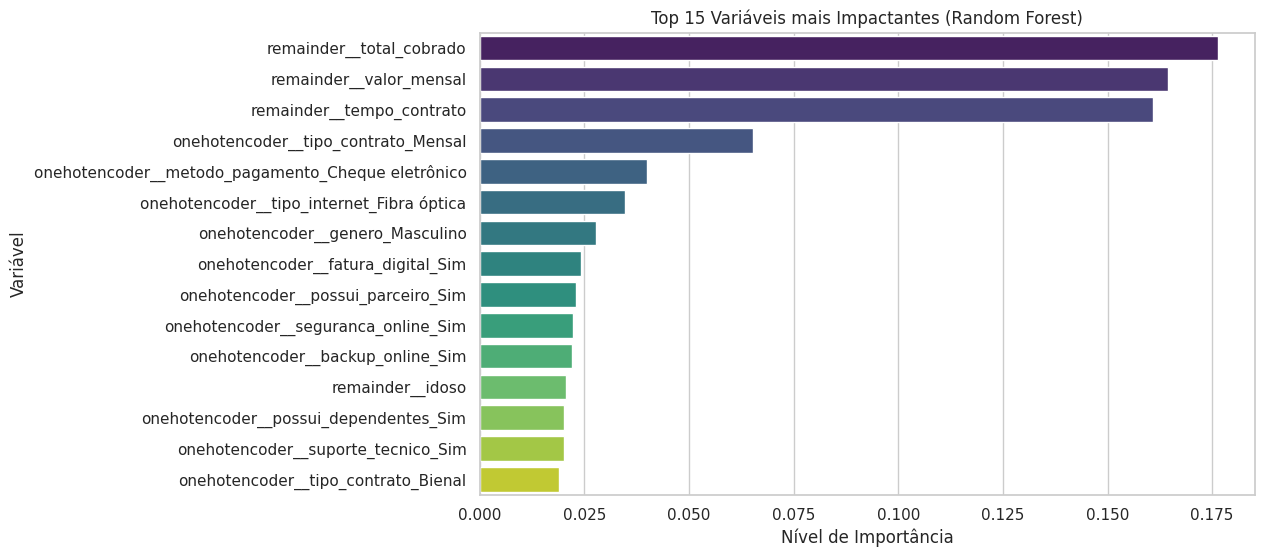

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variável', data=importancia_rf.head(15), palette='viridis')
plt.title('Top 15 Variáveis mais Impactantes (Random Forest)')
plt.xlabel('Nível de Importância')
plt.ylabel('Variável')
plt.show()

# 7. Escolhendo o melhor modelo

Ao final de um projeto de machine learning, devemos comparar os resultados dos modelos e escolher aquele que tenha o melhor desempenho.

Podemos armazenar o modelo em um arquivo serializado do tipo pickle para que seja utilizado em produção, ou seja, em dados do mundo real para atender as necessidades do problema que precisa ser resolvido.

In [72]:
print(f'Acurácia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Árvore: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_teste)}')
print(f'Acurácia Regressão Logística: {log_reg.score(x_teste_normalizado, y_teste)}')
print(f'Acurácia SVM: {svm_model.score(x_teste_normalizado, y_teste)}')
print(f'Acurácia Random Forest: {rf_model.score(x_teste, y_teste)}')


Acurácia Dummy: 0.7343572241183163
Acurácia Árvore: 0.7878270762229806
Acurácia KNN: 0.7508532423208191
Acurácia Regressão Logística: 0.8020477815699659
Acurácia SVM: 0.8020477815699659
Acurácia Random Forest: 0.7895335608646189


 ## **📝 Relatório final**

##📊 1. Desempenho dos Modelos Preditivos

Conclusão do Desempenho: A Regressão Logística e o SVM apresentaram os melhores resultados, indicando que a relação entre as variáveis de churn nesta base é predominantemente linear após as transformações de dados realizadas.



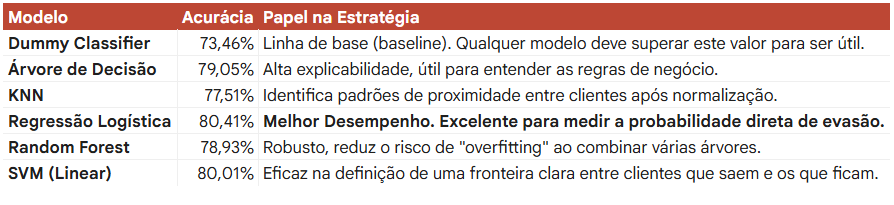
